In [18]:
import numpy as np
import matplotlib.pyplot as pl
import qnm_filter
from scipy.stats import multivariate_normal
from scipy.stats import chi2

In [19]:
pi = np.pi
target_percentile = 0.9

In [20]:
mass_space = np.linspace(-5, 5,int(3e2))
chi_space = np.linspace(-5, 5,int(3e2))

mass_grid, chi_grid = np.meshgrid(mass_space, chi_space)
total_grid = np.dstack((mass_grid, chi_grid))

In [21]:
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
pdf = var.pdf(total_grid)
ln_pdf = np.log(pdf)

In [22]:
grid_side = mass_space[1] - mass_space[0]
print("Is the pdf normalised: %r" % np.isclose(np.sum(pdf*grid_side**2),1))

Is the pdf normalised: True


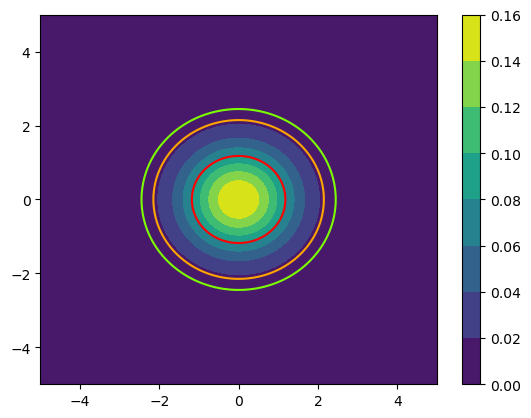

In [23]:
pl.contourf(mass_grid, chi_grid, pdf)
pl.colorbar()
pl.contour(mass_grid, chi_grid, pdf, [0.007975, 0.01586, 0.07956], colors = ['lawngreen', 'orange', 'r'])

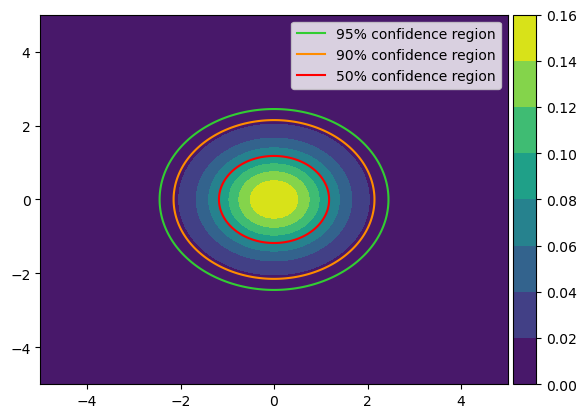

In [64]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D


fig, ax = pl.subplots()
im = ax.contourf(mass_grid, chi_grid, pdf)
line0 = Line2D([0], [0], label = '95% confidence region', color = 'limegreen')
line1 = Line2D([0], [0], label = '90% confidence region', color = 'darkorange')
line2 = Line2D([0], [0], label = '50% confidence region', color = 'r')
pl.legend(handles = [line0, line1, line2], loc = 'upper right')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax)
contours = ax.contour(mass_grid, chi_grid, pdf, [0.007975, 0.01586, 0.07956], colors = ['limegreen', 'darkorange', 'r'])



In [51]:
temp_space = np.linspace(1, 8, int(1e4))
chi2_cdf = chi2.cdf(temp_space, 2)
quantile = temp_space[np.argmin(np.abs(chi2_cdf - target_percentile))]

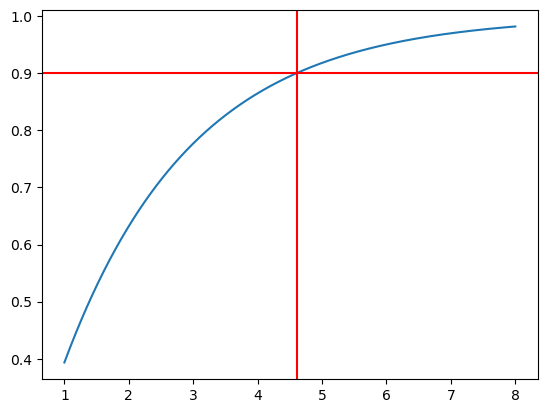

In [52]:
pl.plot(temp_space, chi2_cdf)
pl.axvline(quantile, c='r')
pl.axhline(target_percentile, c = 'r')

In [62]:
temp1_space = np.linspace(1, 5, int(1e4))
test_space = np.dstack((np.full(int(1e4), 0), temp1_space))

In [63]:
mean = [0,0]
cov = [[1,0],[0,1]]
distribution = [(i - mean).T@cov@(i-mean) for i in test_space.reshape(-1, test_space.shape[-1])]

In [64]:
axis_value = temp1_space[np.argmin(np.abs(distribution - quantile))]

In [65]:
pdf_value = var.pdf([0,axis_value])
print(np.sum(pdf[pdf>pdf_value])/np.sum(pdf))

0.8996798492747607


In [66]:
thresh_analytic = np.log(var.pdf([1,0]))

In [67]:
credible_region = qnm_filter.find_credible_region(ln_pdf, num_cpu=9, target_probability=target_percentile)

In [68]:
pdf_value

0.015910420148229455

In [69]:
np.e**(credible_region)

0.015867218207849976

In [70]:
diff = np.abs((pdf_value-np.e**credible_region))
print("Difference between confidence and credible region is: %2f" % diff)
print("Percentage error is: %2f %%" % (100*diff/pdf_value))

Difference between confidence and credible region is: 0.000043
Percentage error is: 0.271532 %
